In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
# brightness of images (8 bits intensity of each image)

ndata_train = x_train.shape[0]
ndata_test = x_test.shape[0]


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.reshape((ndata_train,28,28,1))
x_test = x_test.reshape((ndata_test,28,28,1))


xshape = x_train.shape[1:4]
xshape

(28, 28, 1)

In [30]:
class CNN_Basic(tf.keras.Model):
    def __init__(self):
        super(CNN_Basic, self).__init__()
        self.conv_layer = tf.keras.Sequential([
            layers.Conv2D(32, kernel_size=(3, 3), strides=1, padding='same', input_shape=(28, 28, 1)),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.Conv2D(32, kernel_size=(3, 3), strides=1, padding='same'),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.MaxPooling2D(pool_size=2, strides=2),
            layers.Dropout(0.1),  # Standard dropout rate

            layers.Conv2D(64, kernel_size=(3, 3), strides=1, padding='same'),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.Conv2D(64, kernel_size=(3, 3), strides=1, padding='same'),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.MaxPooling2D(pool_size=2, strides=2),
            layers.Dropout(0.1),  # Standard dropout rate

            layers.Conv2D(128, kernel_size=(3, 3), strides=1, padding='same'),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.MaxPooling2D(pool_size=2, strides=2),
            layers.Dropout(0.1)  # Standard dropout rate, for comparison with modified
        ])
        self.fc_layer = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(512, activation='relu'),
            layers.Dropout(0.1),  # Standard dropout rate, for comparison
            layers.Dense(10, activation='softmax')
        ])

    def call(self, x):
        x = self.conv_layer(x)
        x = self.fc_layer(x)
        return x

In [38]:

class CNN_Modified(tf.keras.Model):
    def __init__(self):
        super(CNN_Modified, self).__init__()
        self.conv_layer = tf.keras.Sequential([
            # First Conv Block with smaller filter size
            layers.Conv2D(32, kernel_size=(3, 3), strides=1, padding='same', input_shape=(28, 28, 1)),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.Conv2D(32, kernel_size=(3, 3), strides=1, padding='same'),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.MaxPooling2D(pool_size=2, strides=2),
            layers.Dropout(0.3),  # Increased dropout

            # Second Conv Block with increased number of filters
            layers.Conv2D(64, kernel_size=(3, 3), strides=1, padding='same'),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.Conv2D(64, kernel_size=(3, 3), strides=1, padding='same'),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.MaxPooling2D(pool_size=2, strides=2),
            layers.Dropout(0.3),  # Increased dropout

            # Third Conv Block
            layers.Conv2D(128, kernel_size=(3, 3), strides=1, padding='same'),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.MaxPooling2D(pool_size=2, strides=2),
            layers.Dropout(0.4)  # Increased dropout
        ])

        self.fc_layer = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(512, activation='relu'),
            layers.Dropout(0.5),  # Keep high dropout before the final layer
            layers.Dense(10, activation='softmax')
        ])

    def call(self, x):
        x = self.conv_layer(x)
        x = self.fc_layer(x)
        return x

In [32]:
# Preparing the data (assuming x_train, y_train are already loaded and preprocessed)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[..., tf.newaxis] / 255.0
x_test = x_test[..., tf.newaxis] / 255.0

In [33]:
# Model instantiation
model_basic = CNN_Basic()

# Model summary (Note: This requires specifying input size to visualize)
model_basic.build((None, 28, 28, 1))
model_basic.summary()

# Model compilation
model_basic.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "cnn__basic_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 3, 3, 128)         140128    
                                                                 
 sequential_7 (Sequential)   (None, 10)                595466    
                                                                 
Total params: 735594 (2.81 MB)
Trainable params: 734954 (2.80 MB)
Non-trainable params: 640 (2.50 KB)
_________________________________________________________________


In [39]:
model_modified = CNN_Modified()

# Model summary (Note: This requires specifying input size to visualize)
model_modified.build((None, 28, 28, 1))
model_modified.summary()

model_modified.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

Model: "cnn__modified_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_10 (Sequential)  (None, 3, 3, 128)         140128    
                                                                 
 sequential_11 (Sequential)  (None, 10)                595466    
                                                                 
Total params: 735594 (2.81 MB)
Trainable params: 734954 (2.80 MB)
Non-trainable params: 640 (2.50 KB)
_________________________________________________________________


In [35]:
history_basic = model_basic.fit(x_train, y_train, epochs=20, validation_split=0.2, batch_size=128)

Epoch 1/20
375/375 [==============================] - 10s 18ms/step - loss: 0.2478 - accuracy: 0.9312 - val_loss: 0.7410 - val_accuracy: 0.7163
Epoch 2/20
375/375 [==============================] - 6s 17ms/step - loss: 0.0516 - accuracy: 0.9839 - val_loss: 0.0485 - val_accuracy: 0.9847
Epoch 3/20
375/375 [==============================] - 6s 17ms/step - loss: 0.0377 - accuracy: 0.9878 - val_loss: 0.0437 - val_accuracy: 0.9862
Epoch 4/20
375/375 [==============================] - 7s 18ms/step - loss: 0.0308 - accuracy: 0.9900 - val_loss: 0.0335 - val_accuracy: 0.9902
Epoch 5/20
375/375 [==============================] - 7s 18ms/step - loss: 0.0265 - accuracy: 0.9914 - val_loss: 0.0341 - val_accuracy: 0.9894
Epoch 6/20
375/375 [==============================] - 6s 17ms/step - loss: 0.0228 - accuracy: 0.9929 - val_loss: 0.0332 - val_accuracy: 0.9893
Epoch 7/20
375/375 [==============================] - 6s 17ms/step - loss: 0.0204 - accuracy: 0.9932 - val_loss: 0.0303 - val_accuracy: 0.991

In [40]:
history_modified = model_modified.fit(x_train, y_train, epochs=20, validation_split=0.2, batch_size=128)

Epoch 1/20
375/375 [==============================] - 10s 18ms/step - loss: 0.4950 - accuracy: 0.8441 - val_loss: 0.6180 - val_accuracy: 0.7994
Epoch 2/20
375/375 [==============================] - 6s 17ms/step - loss: 0.1169 - accuracy: 0.9647 - val_loss: 0.0492 - val_accuracy: 0.9847
Epoch 3/20
375/375 [==============================] - 6s 17ms/step - loss: 0.0828 - accuracy: 0.9750 - val_loss: 0.0377 - val_accuracy: 0.9892
Epoch 4/20
375/375 [==============================] - 6s 17ms/step - loss: 0.0664 - accuracy: 0.9793 - val_loss: 0.0414 - val_accuracy: 0.9882
Epoch 5/20
375/375 [==============================] - 7s 18ms/step - loss: 0.0584 - accuracy: 0.9826 - val_loss: 0.0281 - val_accuracy: 0.9918
Epoch 6/20
375/375 [==============================] - 6s 17ms/step - loss: 0.0515 - accuracy: 0.9845 - val_loss: 0.0301 - val_accuracy: 0.9917
Epoch 7/20
375/375 [==============================] - 6s 17ms/step - loss: 0.0456 - accuracy: 0.9861 - val_loss: 0.0290 - val_accuracy: 0.992

In [41]:
# Check the highest validation accuracy achieved during training
val_accuracy_basic = max(history_basic.history['val_accuracy'])
print(f"CNN_Basic Highest validation accuracy: {val_accuracy_basic*100:.2f}%")

val_accuracy_modified = max(history_modified.history['val_accuracy'])
print(f"CNN_Modified Highest validation accuracy: {val_accuracy_modified*100:.2f}%")

CNN_Basic Highest validation accuracy: 99.42%
CNN_Modified Highest validation accuracy: 99.54%


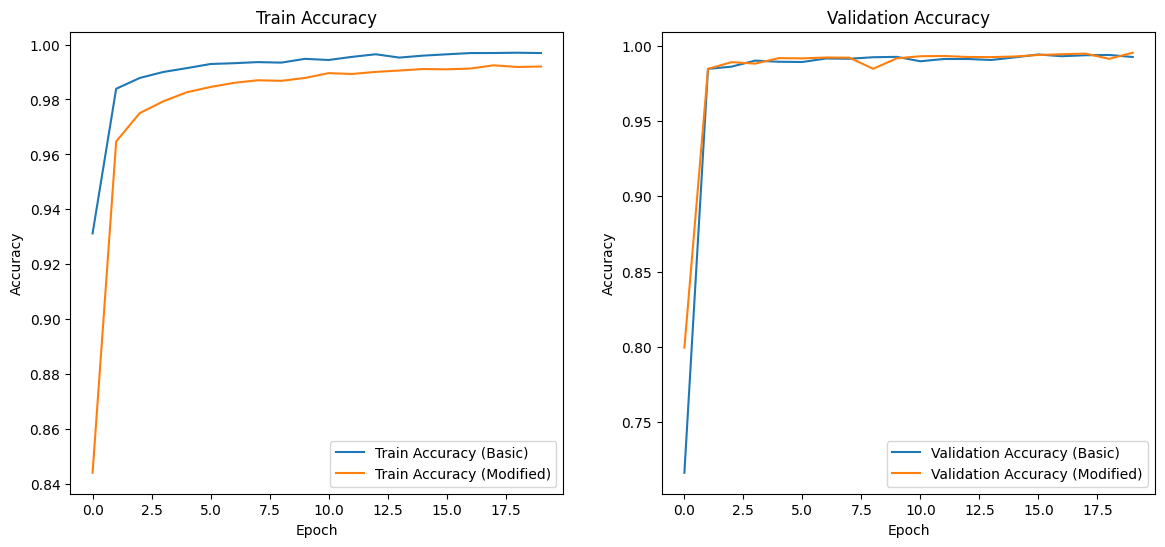

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))

# Plot basic model accuracy
plt.subplot(1, 2, 1)
plt.plot(history_basic.history['accuracy'], label='Train Accuracy (Basic)')
plt.plot(history_modified.history['accuracy'], label='Train Accuracy (Modified)')
plt.title('Train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')

# Plot modified model accuracy
plt.subplot(1, 2, 2)
plt.plot(history_basic.history['val_accuracy'], label='Validation Accuracy (Basic)')
plt.plot(history_modified.history['val_accuracy'], label='Validation Accuracy (Modified)')
plt.title('Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.show()

In [47]:
# Select CNN_Modified with higher validation accuracy
model = model_modified

In [48]:


# Retrain on the entire dataset
model.fit(x_train, y_train, epochs=30, batch_size=128)


Epoch 1/30
469/469 [==============================] - 85s 17ms/step - loss: 0.0261 - accuracy: 0.9925
Epoch 2/30
469/469 [==============================] - 7s 16ms/step - loss: 0.0247 - accuracy: 0.9922
Epoch 3/30
469/469 [==============================] - 8s 16ms/step - loss: 0.0258 - accuracy: 0.9924
Epoch 4/30
469/469 [==============================] - 8s 16ms/step - loss: 0.0212 - accuracy: 0.9936
Epoch 5/30
469/469 [==============================] - 7s 16ms/step - loss: 0.0214 - accuracy: 0.9933
Epoch 6/30
469/469 [==============================] - 8s 17ms/step - loss: 0.0197 - accuracy: 0.9939
Epoch 7/30
469/469 [==============================] - 8s 17ms/step - loss: 0.0192 - accuracy: 0.9937
Epoch 8/30
469/469 [==============================] - 8s 16ms/step - loss: 0.0208 - accuracy: 0.9938
Epoch 9/30
469/469 [==============================] - 8s 16ms/step - loss: 0.0191 - accuracy: 0.9937
Epoch 10/30
469/469 [==============================] - 7s 16ms/step - loss: 0.0196 - accur

In [49]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy after retraining on the full dataset: {test_acc*100:.2f}%")

313/313 [==============================] - 1s 4ms/step - loss: 0.0179 - accuracy: 0.9956
Test accuracy after retraining on the full dataset: 99.56%


In [51]:
print('This model predicts '+str(model.evaluate(x_test,y_test)[1]*100) +'% of the test data correctly')

313/313 [==============================] - 1s 3ms/step - loss: 0.0179 - accuracy: 0.9956
This model predicts 99.55999851226807% of the test data correctly
